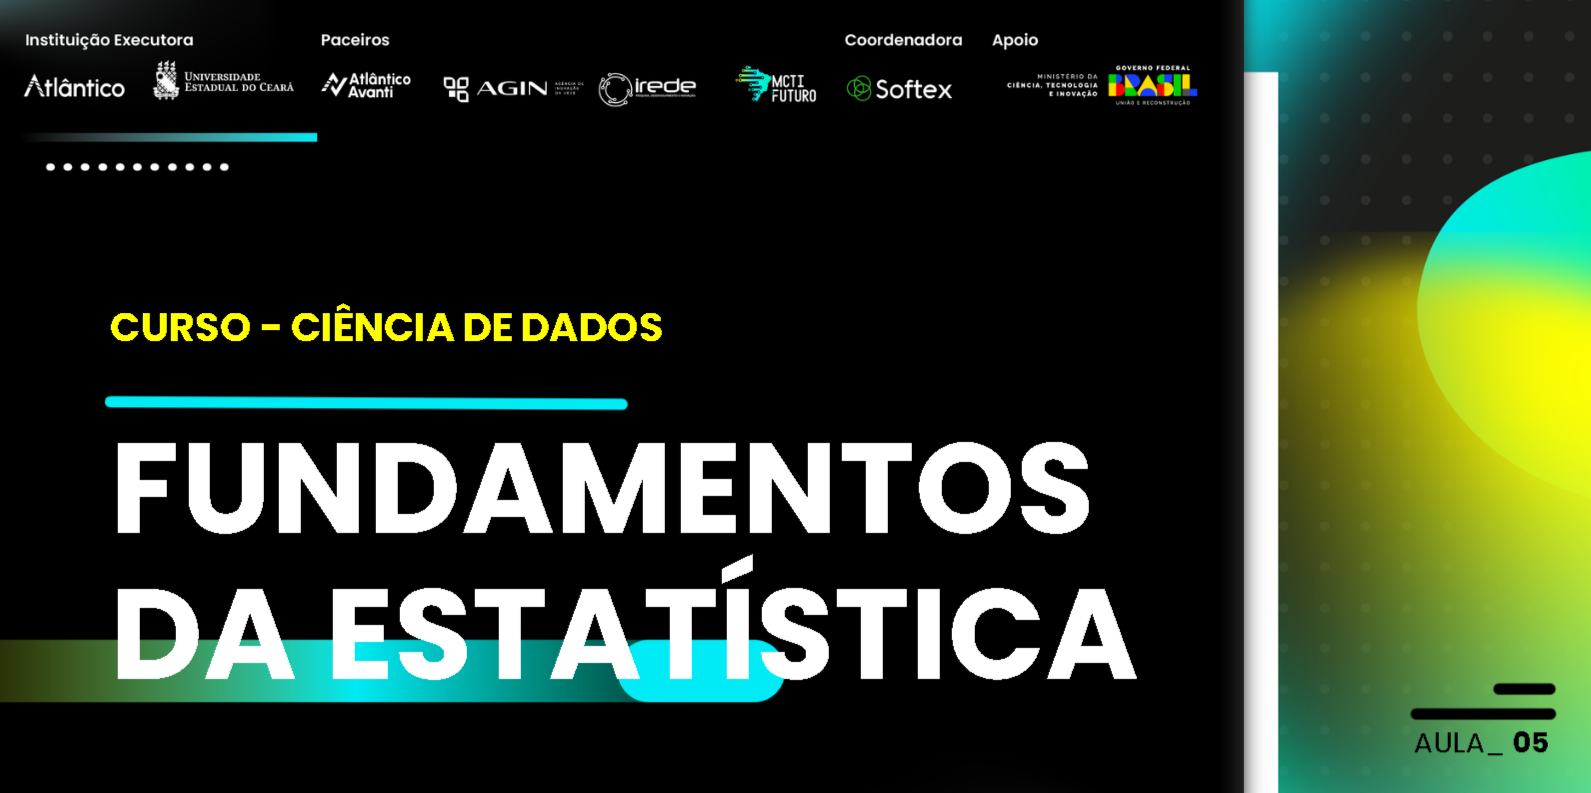

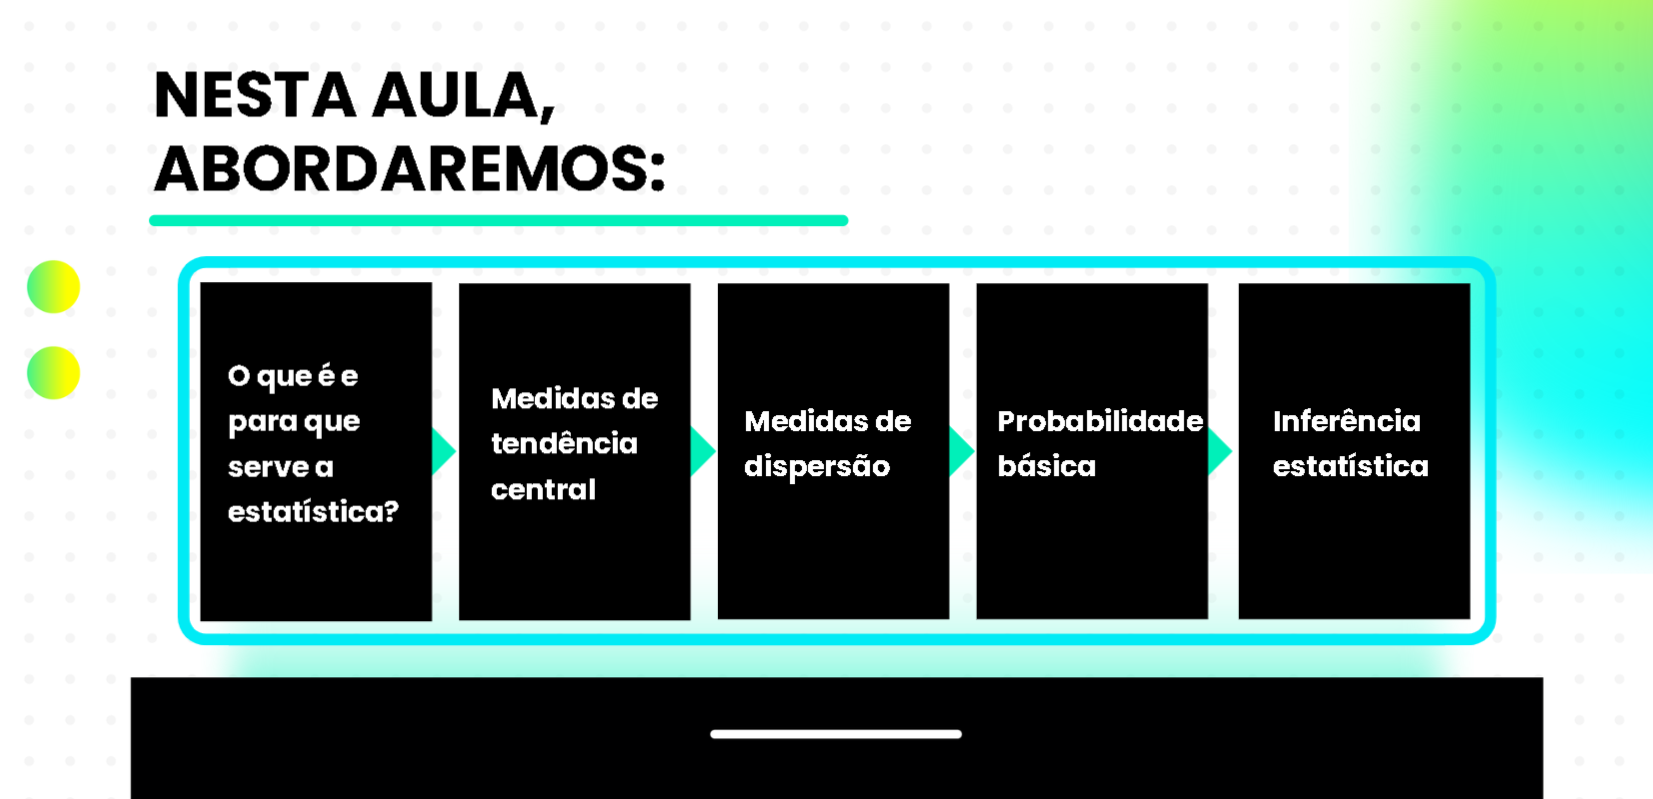

### Problema: Análise de Satisfação do Cliente para uma Empresa de e-commerce

Imagine que você está trabalhando como cientista de dados para uma empresa de e-commerce e recebeu uma base de dados de uma pesquisa de satisfação do cliente. O objetivo é entender melhor o comportamento e a satisfação dos clientes, identificar padrões e realizar inferências sobre a população de clientes com base em uma amostra.

#### Perguntas para análise

- Qual é a média e a variabilidade na satisfação dos clientes?
- Existe uma diferença significativa na satisfação entre diferentes faixas etárias ou segmentos?
- Podemos inferir que uma alta porcentagem de clientes está satisfeita?

### 1. Bibliotecas Necessárias

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

import scipy.stats as stats


 1.1 - numpy: É uma biblioteca fundamental para operações numéricas em Python, especialmente útil para trabalhar com arrays e matrizes multidimensionais. NumPy permite realizar operações matemáticas rápidas e eficientes, como somas, multiplicações, transformações e cálculos matemáticos complexos em grandes conjuntos de dados.

 1.2 - pandas: É uma biblioteca poderosa para manipulação e análise de dados. Ela oferece estruturas de dados como DataFrames e Series, que facilitam o armazenamento, manipulação e análise de dados tabulares. Pandas é amplamente utilizada em tarefas como limpeza, agregação, filtragem e visualização de dados.

 1.3 - matplotlib: Uma biblioteca de visualização de dados em Python, especialmente útil para criar gráficos como linhas, barras, dispersões e histogramas. Matplotlib permite personalizar gráficos de maneira detalhada e é amplamente utilizada para explorar visualmente conjuntos de dados e interpretar resultados.


1.4 - sciPy: É uma biblioteca para cálculos científicos e matemáticos avançados. O módulo stats em particular fornece uma ampla gama de ferramentas estatísticas, como distribuições, testes estatísticos, análises de probabilidade e modelos de ajuste de dados, sendo ideal para análise estatística profunda e modelagem.

### 2. Estatística Descritiva para Entendimento dos Dados

Carregar um conjunto de dados fictício com informações de satisfação dos clientes, idade, e segmentação de mercado.

In [2]:
data = pd.DataFrame({
    'idade': np.random.randint(18, 70, size=200),
    'satisfacao': np.random.randint(1, 6, size=200),  # Satisfação em escala de 1 a 5
    'segmento': np.random.choice(['A', 'B', 'C'], size=200)
})

print(data)

     idade  satisfacao segmento
0       68           3        A
1       25           1        B
2       60           4        B
3       40           2        C
4       39           3        A
..     ...         ...      ...
195     49           4        B
196     68           5        C
197     48           1        C
198     27           5        C
199     61           2        B

[200 rows x 3 columns]


Neste exemplo, segmento representa uma classificação de clientes baseada em características ou perfis específicos que a empresa utiliza para entender melhor seu público. Em empresas de e-commerce, a segmentação de clientes é uma prática comum para identificar grupos com características e comportamentos similares, permitindo uma personalização mais eficaz das estratégias de marketing e atendimento.

No caso da nossa análise, imagine que os segmentos (A, B e C) poderiam representar diferentes perfis de clientes, tais como:

- Segmento A: Clientes frequentes, que compram mais de uma vez por mês.
- Segmento B: Clientes sazonais, que compram em épocas específicas, como datas comemorativas.
- Segmento C: Novos clientes ou clientes eventuais, que compraram poucas vezes.

Esses segmentos ajudam a identificar se a satisfação varia conforme o perfil do cliente. Por exemplo, podemos investigar se clientes frequentes (Segmento A) estão mais satisfeitos em relação aos novos clientes (Segmento C). Isso é útil para a empresa entender e ajustar estratégias, como melhorar a experiência para novos clientes ou manter a fidelidade dos clientes frequentes.

No dataset fictício, os segmentos são identificados com letras (A, B, C) para simplificação, mas na prática, eles poderiam ser identificados de várias maneiras, dependendo das características de cada grupo.

### 2.1  Medidas de Tendência Central

Vamos calcular as medidas de tendência central para cada segmento de clientes (A, B e C). Essas medidas incluem a média, mediana e moda, que nos dão uma visão da satisfação central para cada grupo.

In [3]:
listaMedias = []
listaMedianas = []
listaModas = []
segmentos = sorted(data['segmento'].unique()) # unique: é usado para obter todos os valores únicos (ou seja, sem duplicação) 
# Calcule a média, mediana e moda para cada segmento
for segmento in segmentos :
    segmento_data = data[data['segmento'] == segmento]['satisfacao']
    
    media = segmento_data.mean()
    mediana = segmento_data.median()
    moda = segmento_data.mode().iloc[0]  # Usamos iloc para pegar o primeiro valor, caso haja múltiplas modas
    listaMedias.append(media)
    listaMedianas.append(mediana)
    listaModas.append(moda)
    
    print(f"Segmento {segmento}:")
    print(f"  Média de Satisfação: {media}")
    print(f"  Mediana de Satisfação: {mediana}")
    print(f"  Moda de Satisfação: {moda}")
    print("\n")

Segmento A:
  Média de Satisfação: 3.0833333333333335
  Mediana de Satisfação: 3.0
  Moda de Satisfação: 3


Segmento B:
  Média de Satisfação: 2.7681159420289854
  Mediana de Satisfação: 3.0
  Moda de Satisfação: 1


Segmento C:
  Média de Satisfação: 2.9859154929577465
  Mediana de Satisfação: 3.0
  Moda de Satisfação: 3




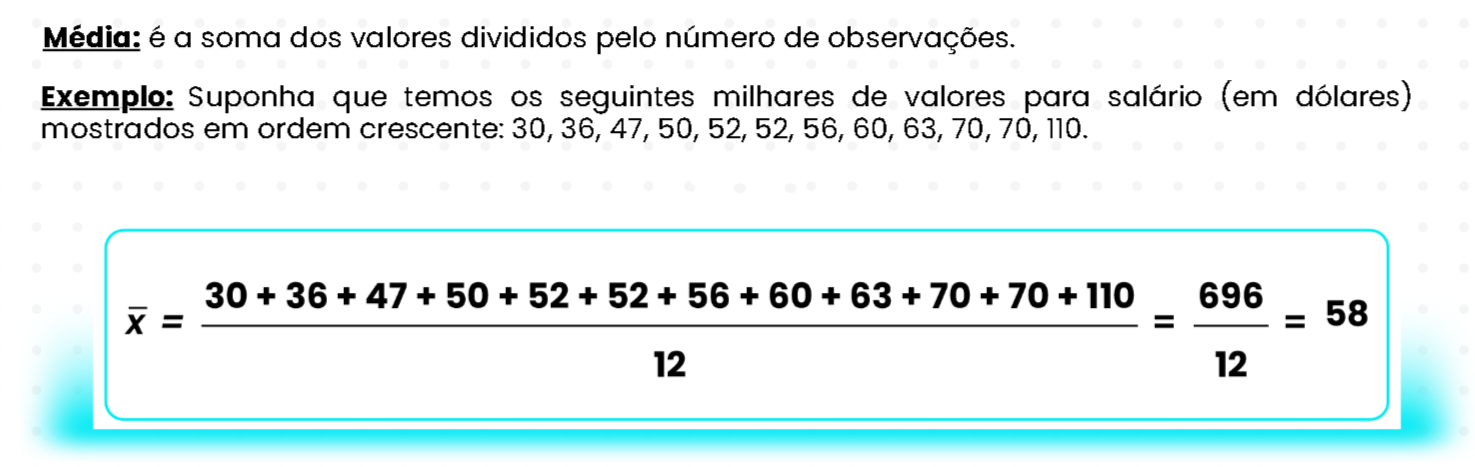

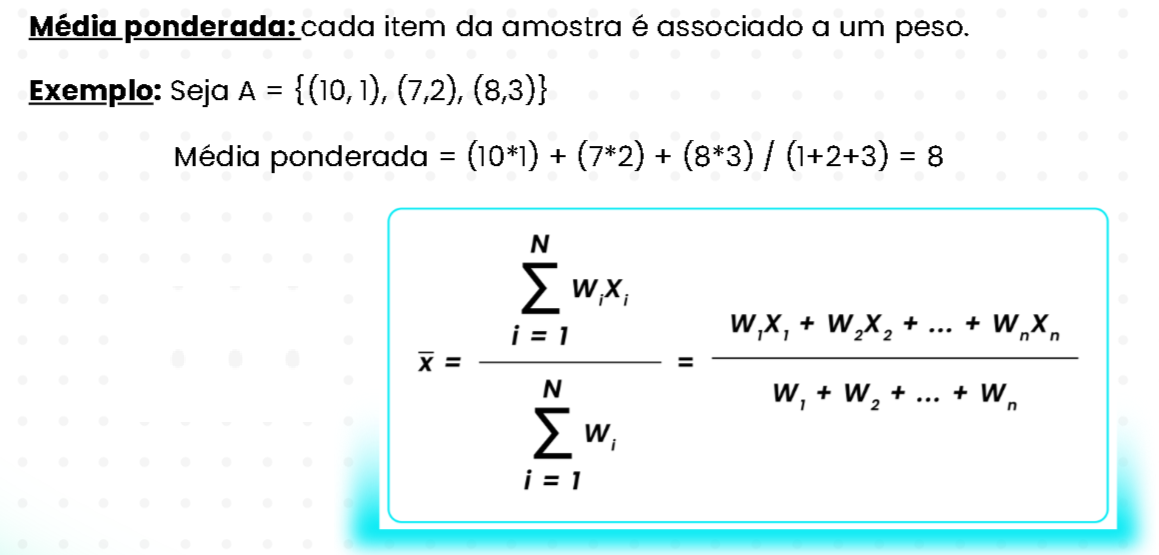

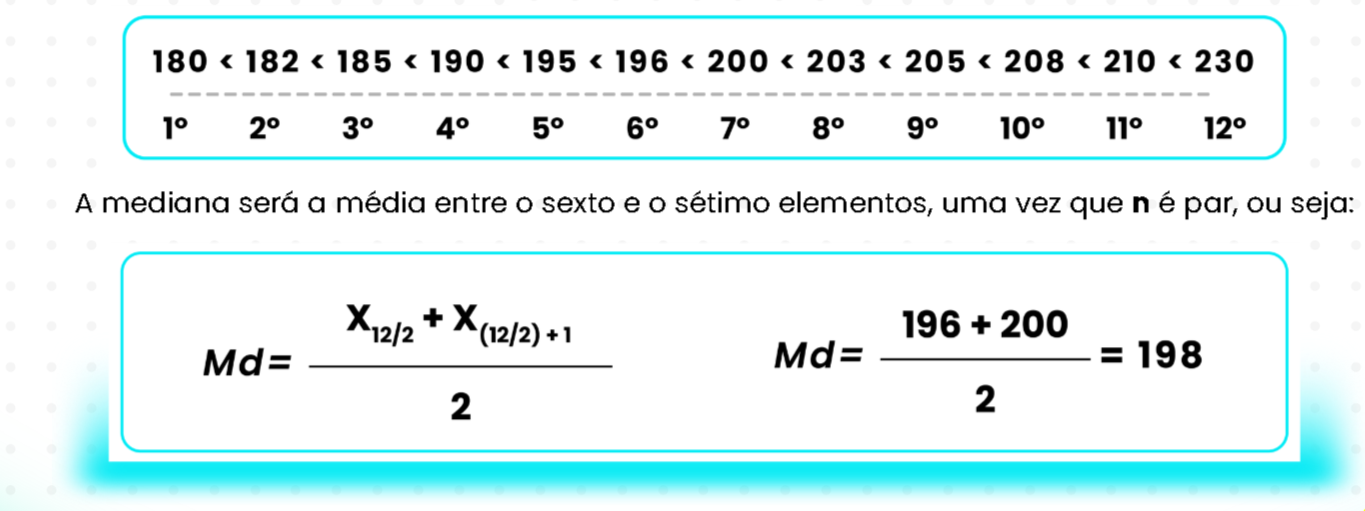

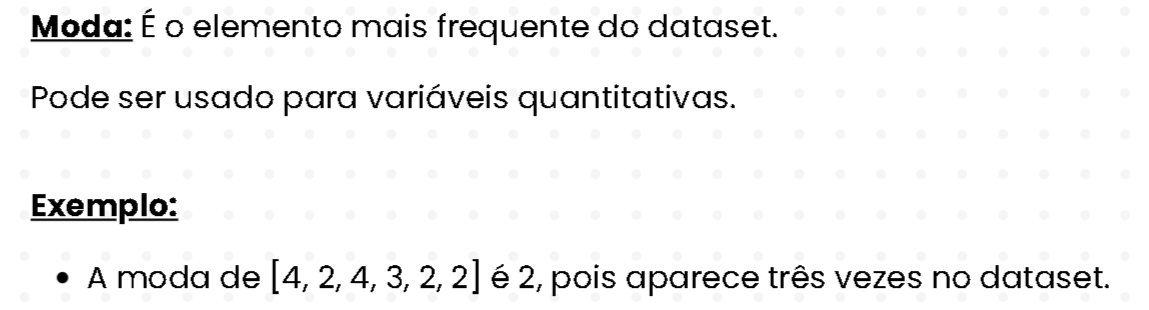

In [4]:
import pandas as pd

# Dados dos segmentos
dados_segmentos = {
    "Segmento": segmentos,
    "Média de Satisfação": listaMedias,
    "Mediana de Satisfação": listaMedianas,
    "Moda de Satisfação": listaModas
}

# Criando o DataFrame
df_segmentos = pd.DataFrame(dados_segmentos)

# Exibindo o DataFrame
df_segmentos

,Segmento,Média de Satisfação,Mediana de Satisfação,Moda de Satisfação
0,A,3.083333,3.0,3
1,B,2.768116,3.0,1
2,C,2.985915,3.0,3


#### Discussão dos Resultados
- Média:

A média representa a satisfação média dos clientes dentro de cada segmento.
Se, por exemplo, o Segmento A tiver uma média de satisfação mais alta do que os segmentos B e C, isso pode indicar que os clientes frequentes estão mais satisfeitos com o serviço.
Uma média menor em algum segmento pode sugerir que esses clientes têm expectativas não atendidas ou experiências de compra menos satisfatórias.

- Mediana:

A mediana mostra o valor central da satisfação, o que ajuda a entender a pontuação mais comum de satisfação que divide o grupo em duas metades.
Uma mediana próxima à média indica uma distribuição simétrica das satisfações.
Se a mediana for muito diferente da média, pode haver outliers (extremos) no conjunto de dados, como clientes extremamente insatisfeitos ou extremamente satisfeitos, que influenciam a média.

- Moda:

A moda indica o valor de satisfação que ocorre com maior frequência.
Por exemplo, se a moda do Segmento C for 3 (satisfação neutra), isso pode significar que muitos dos novos clientes têm uma experiência neutra ou média.
A moda ajuda a identificar o nível de satisfação mais comum entre os clientes de cada segmento, sendo útil para observar padrões recorrentes.

<Figure size 1000x600 with 0 Axes>

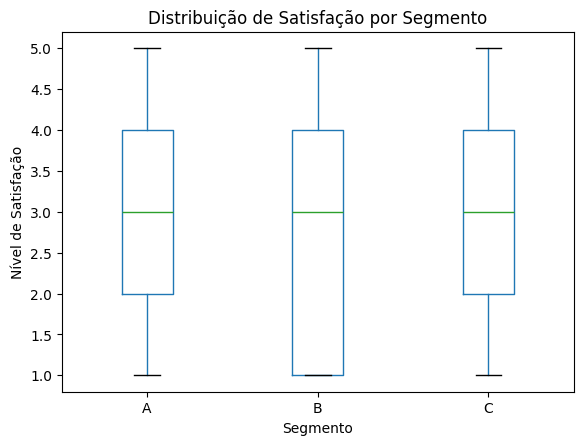

In [5]:
# Gerando o boxplot para visualizar a distribuição de satisfação por segmento
plt.figure(figsize=(10, 6))
data.boxplot(column='satisfacao', by='segmento', grid=False)
plt.title("Distribuição de Satisfação por Segmento")
plt.suptitle("")
plt.xlabel("Segmento")
plt.ylabel("Nível de Satisfação")
plt.show()

### 2.2  Medidas de Dispersão

Para analisar a dispersão dos dados, vamos calcular as principais medidas de dispersão para cada segmento, o que nos ajuda a entender a variabilidade na satisfação dos clientes. Isso inclui amplitude, variância, desvio padrão e coeficiente de variação. Essas medidas oferecem uma visão mais aprofundada sobre o quanto as avaliações de satisfação se distanciam da média e da consistência dos valores.

- Amplitude:

Amplitude é a diferença entre o valor máximo e mínimo, indicando a faixa total de variação na satisfação dos clientes.
Nos ajuda a ver quão ampla é a variação nas notas, o que pode mostrar se há clientes muito insatisfeitos ou muito satisfeitos.

- Variância:

Variância é uma medida da média dos desvios ao quadrado da média.
Quanto maior a variância, maior a dispersão dos valores em relação à média.
É útil para entender a variabilidade geral, mas como está em unidades ao quadrado, muitas vezes usamos o desvio padrão para interpretação mais intuitiva.

- Desvio Padrão:

Desvio padrão é a raiz quadrada da variância e fornece uma medida de dispersão no mesmo nível dos dados originais.
Indica o quão distante, em média, cada valor está da média.

- Coeficiente de Variação (CV):

Coeficiente de variação é calculado como o desvio padrão dividido pela média.
É útil para comparar a variabilidade entre conjuntos de dados com médias diferentes, fornecendo uma medida relativa da dispersão.



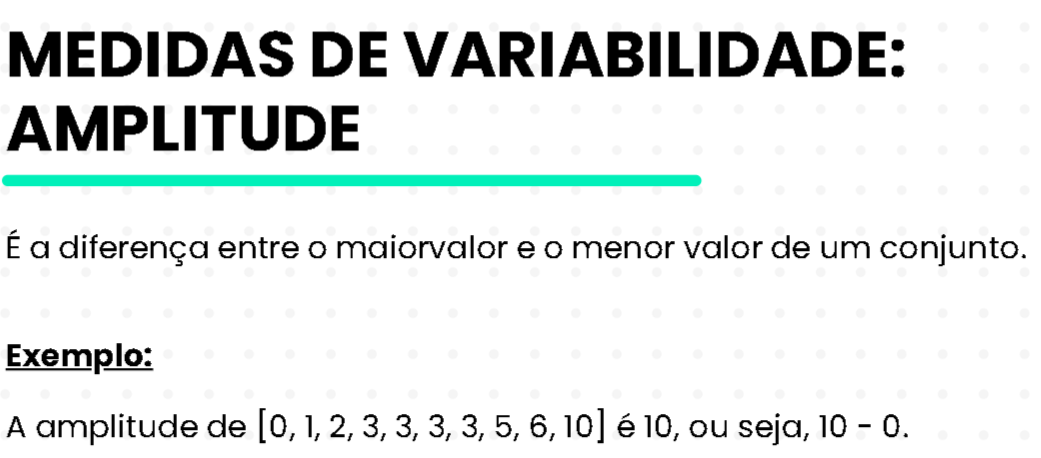

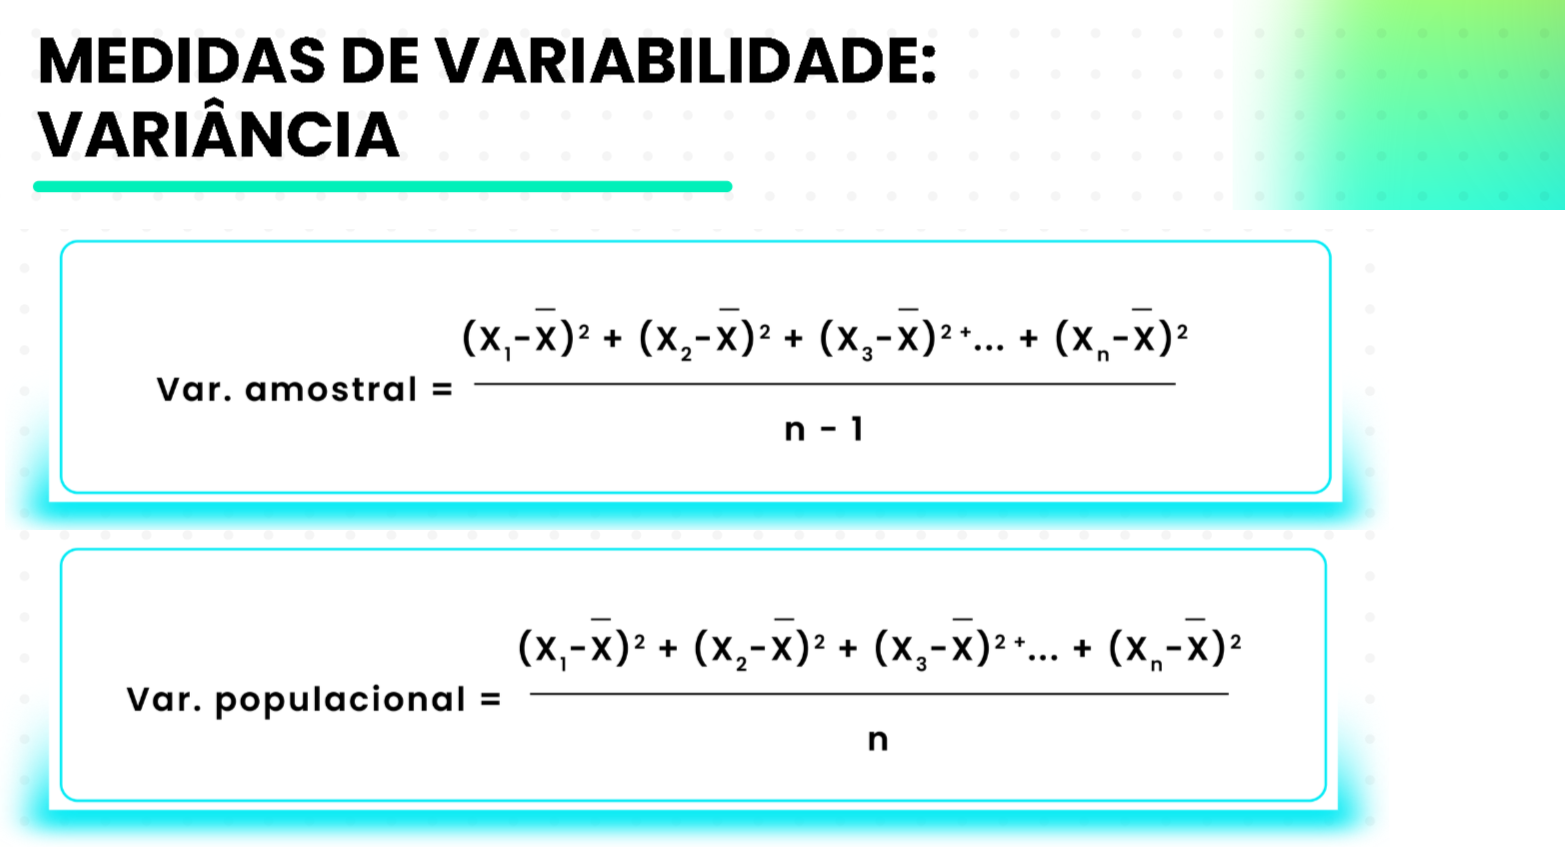

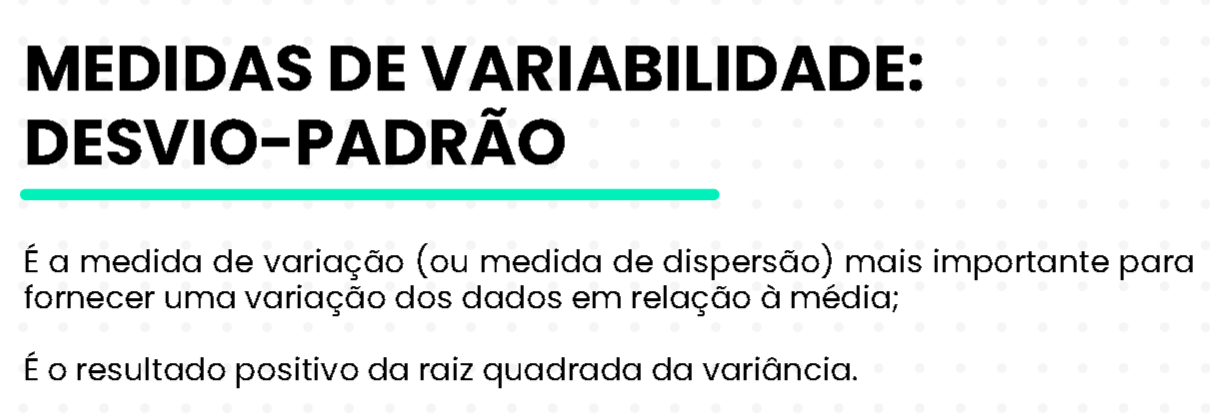

### Vamos calcular essas medidas para cada segmento usando Python:

In [6]:
# Filtrar dados por segmento e calcular medidas de dispersão
medidas_dispersao = []

for segmento in sorted(data['segmento'].unique()):
    segmento_data = data[data['segmento'] == segmento]['satisfacao']
    
    amplitude = segmento_data.max() - segmento_data.min() # max() retorna valor máximo e min() valor mínimo
    variancia = segmento_data.var() # var() função para calcular a variancia
    desvio_padrao = segmento_data.std() # std() função para caluclar o desvio padrão
    coeficiente_variacao = desvio_padrao / segmento_data.mean() if segmento_data.mean() != 0 else 0
    
    medidas_dispersao.append({
        "Segmento": segmento,
        "Amplitude": amplitude,
        "Variância": variancia,
        "Desvio Padrão": desvio_padrao,
        "Coeficiente de Variação": coeficiente_variacao
    })

df_dispersao = pd.DataFrame(medidas_dispersao)

# Exibindo o DataFrame com as medidas de dispersão
df_dispersao


,Segmento,Amplitude,Variância,Desvio Padrão,Coeficiente de Variação
0,A,4,2.111582,1.453128,0.471285
1,B,4,1.886616,1.373541,0.496201
2,C,4,1.899799,1.378332,0.461611


### Após calcular essas medidas para cada segmento, podemos interpretar os resultados:

- Amplitude: Se um segmento apresenta uma amplitude muito alta, isso indica uma grande variedade de opiniões dentro do grupo. Clientes com uma faixa ampla podem ter experiências de satisfação muito variáveis.


- Variância e Desvio Padrão: Um desvio padrão ou variância alta mostra que há muita variabilidade nas avaliações. Isso pode indicar que a empresa precisa de estratégias para tornar a experiência de compra mais consistente para esse grupo. Segmentos com desvio padrão baixo têm avaliações mais próximas da média, sugerindo uma experiência mais uniforme.


- Coeficiente de Variação: Esse valor permite comparar a dispersão entre segmentos de diferentes médias. Um coeficiente de variação alto indica maior variabilidade em relação à média de satisfação e pode significar que a experiência dos clientes é inconsistente.

## Para introduzir conceitos básicos de probabilidade no contexto da análise de satisfação dos clientes, vamos trabalhar com eventos, espaços amostrais e probabilidades associadas a diferentes cenários dentro dos segmentos de clientes. 

### 3. Conceitos de Probabilidade Básica


- Espaço Amostral (S):

O espaço amostral representa o conjunto de todos os possíveis resultados.
No nosso caso, o espaço amostral é composto por todas as avaliações de satisfação dos clientes para cada segmento. Se estamos analisando, por exemplo, a satisfação dos clientes do Segmento A, o espaço amostral 
(S) será o conjunto de todas as notas de satisfação dos clientes nesse segmento.


- Eventos:

Um evento é um subconjunto do espaço amostral. Por exemplo:

###### Evento A: Um cliente do Segmento A deu uma nota maior que 3 (ou seja, está relativamente satisfeito).
###### Evento B: Um cliente do Segmento B deu uma nota menor ou igual a 2 (indicando insatisfação).
###### Evento C: Um cliente do Segmento C deu uma nota igual a 5 (máxima satisfação).

Esses eventos podem ser definidos para responder a perguntas específicas sobre a satisfação dos clientes.

- Probabilidade de um Evento:

A probabilidade de um evento é a razão entre o número de resultados favoráveis ao evento e o número total de resultados no espaço amostral.
Por exemplo, a probabilidade de um cliente do Segmento A dar uma nota maior que 3 (Evento A) é o número de clientes do Segmento A que deram nota maior que 3, dividido pelo número total de clientes no Segmento A.

### Vamos calcular algumas probabilidades no contexto dos segmentos, usando os dados de satisfação.

In [7]:
# Contagem do número total de avaliações em cada segmento
total_A = len(data[data['segmento'] == 'A'])
total_B = len(data[data['segmento'] == 'B'])
total_C = len(data[data['segmento'] == 'C'])

# Definindo eventos e calculando probabilidades

# Evento A: Cliente do Segmento A deu uma nota maior que 3
evento_A_favoraveis = len(data[(data['segmento'] == 'A') & (data['satisfacao'] > 3)])
prob_evento_A = evento_A_favoraveis / total_A

# Evento B: Cliente do Segmento B deu uma nota menor ou igual a 2
evento_B_favoraveis = len(data[(data['segmento'] == 'B') & (data['satisfacao'] <= 2)])
prob_evento_B = evento_B_favoraveis / total_B

# Evento C: Cliente do Segmento C deu uma nota igual a 5
evento_C_favoraveis = len(data[(data['segmento'] == 'C') & (data['satisfacao'] == 5)])
prob_evento_C = evento_C_favoraveis / total_C

# Exibindo as probabilidades
print(f"Probabilidade de um cliente do Segmento A dar uma nota maior que 3: {prob_evento_A:.2f}")
print(f"Probabilidade de um cliente do Segmento B dar uma nota menor ou igual a 2: {prob_evento_B:.2f}")
print(f"Probabilidade de um cliente do Segmento C dar uma nota igual a 5: {prob_evento_C:.2f}")


Probabilidade de um cliente do Segmento A dar uma nota maior que 3: 0.42
Probabilidade de um cliente do Segmento B dar uma nota menor ou igual a 2: 0.42
Probabilidade de um cliente do Segmento C dar uma nota igual a 5: 0.20


- Probabilidade de Satisfação Relativamente Alta no Segmento A (𝑃(𝐴)):

Se a probabilidade de um cliente do Segmento A dar uma nota maior que 3 é, por exemplo, 0.60, isso indica que 60% dos clientes frequentes desse segmento tendem a avaliar o serviço como satisfatório ou muito satisfatório.
Esse valor pode ser usado para avaliar se os clientes do Segmento A estão satisfeitos de maneira consistente.


- Probabilidade de Insatisfação no Segmento B (𝑃(𝐵)):

Se a probabilidade de um cliente do Segmento B dar uma nota de 2 ou menos é 0.30, isso indica que 30% dos clientes sazonais estão insatisfeitos.
Essa informação pode ser útil para entender o nível de insatisfação e pensar em melhorias específicas para esses clientes.


- Probabilidade de Máxima Satisfação no Segmento C (𝑃(𝐶)):

Se a probabilidade de um cliente do Segmento C dar uma nota de 5 é 0.15, isso indica que 15% dos novos clientes estão extremamente satisfeitos com o serviço.
Esse valor pode orientar a empresa a explorar o que agrada os clientes novos e tentar aumentar essa porcentagem.

###  Vamos estender a análise com o conceito de probabilidade condicional para fornecer uma visão mais detalhada de como certos eventos dependem de outros no contexto dos segmentos de satisfação dos clientes.

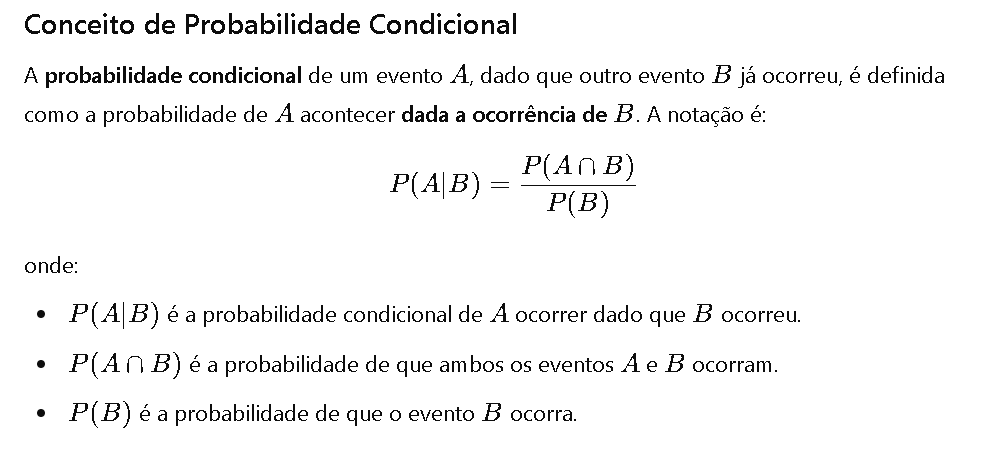

### Essa definição é útil para calcular a probabilidade de satisfação específica entre clientes que já pertencem a um segmento particular.

Vamos usar a probabilidade condicional para responder a perguntas mais específicas. Considerando os segmentos A, B e C e as notas de satisfação dos clientes, podemos definir e calcular probabilidades condicionais, como:

- Probabilidade de um cliente do Segmento A estar satisfeito (nota maior que 3), dado que ele pertence ao Segmento A.
- Probabilidade de um cliente do Segmento B estar insatisfeito (nota menor ou igual a 2), dado que ele pertence ao Segmento B.
- Probabilidade de um cliente do Segmento C estar extremamente satisfeito (nota igual a 5), dado que ele pertence ao Segmento C.


Esses cálculos já foram feitos como probabilidades simples porque cada cálculo está condicionado ao segmento do cliente, ou seja, ao evento "ser do Segmento A", "ser do Segmento B", etc.

No entanto, podemos explorar mais o conceito calculando uma probabilidade condicional de dupla:

- Por exemplo, se quisermos calcular a probabilidade de que um cliente pertence ao Segmento A, dado que ele deu uma nota maior que 3.

Para calcular essa probabilidade, precisamos:

- Contar o número de clientes que deram nota maior que 3 e estão no Segmento A (𝑃(𝐴 ∩ 𝐵)).
- Dividir pelo total de clientes que deram nota maior que 3 (𝑃(𝐵)).

In [8]:
# Evento: Cliente deu uma nota maior que 3 (Evento B)
total_nota_maior_3 = len(data[data['satisfacao'] > 3])

# Evento: Cliente pertence ao Segmento A e deu uma nota maior que 3 (Evento A ∩ B)
evento_A_e_B = len(data[(data['segmento'] == 'A') & (data['satisfacao'] > 3)])

# Probabilidade condicional: Cliente pertence ao Segmento A dado que deu nota maior que 3
prob_A_dado_nota_maior_3 = evento_A_e_B / total_nota_maior_3

print(f"Probabilidade de um cliente ser do Segmento A dado que ele deu uma nota maior que 3: {prob_A_dado_nota_maior_3:.2f}")


Probabilidade de um cliente ser do Segmento A dado que ele deu uma nota maior que 3: 0.34


#### Interpretação dos Resultados

Suponha que o resultado seja, por exemplo, 0.35 ou 35%. Isso significa que, entre todos os clientes que deram uma nota maior que 3, 35% pertencem ao Segmento A.

Esse tipo de probabilidade condicional permite respostas para perguntas como: 

"Qual a probabilidade de um cliente estar no Segmento A, se ele está satisfeito?" Esse insight é útil para entender qual segmento tem uma maior proporção de clientes satisfeitos em relação aos outros.

Esse conceito permite uma análise mais profunda, especialmente se quisermos ver a satisfação relativa entre diferentes grupos ou tipos de eventos.

### 4. Inferência Estatística


Para aplicar o conceito de inferência estatística ao problema da satisfação dos clientes, vamos explorar duas ferramentas comuns: 

- intervalos de confiança 
- testes de hipóteses. 

Essas técnicas nos permitem fazer afirmações sobre a população de clientes com base nos dados da amostra de cada segmento, ajudando a generalizar os insights obtidos a partir dos dados observados.

### 4.1. Intervalos Confiança

Um intervalo de confiança nos dá uma faixa de valores na qual acreditamos que a média real da população (satisfação média) provavelmente se encontra. Em nosso caso, podemos calcular o intervalo de confiança para a média de satisfação de cada segmento, o que ajuda a entender a satisfação esperada da população de clientes de cada grupo.

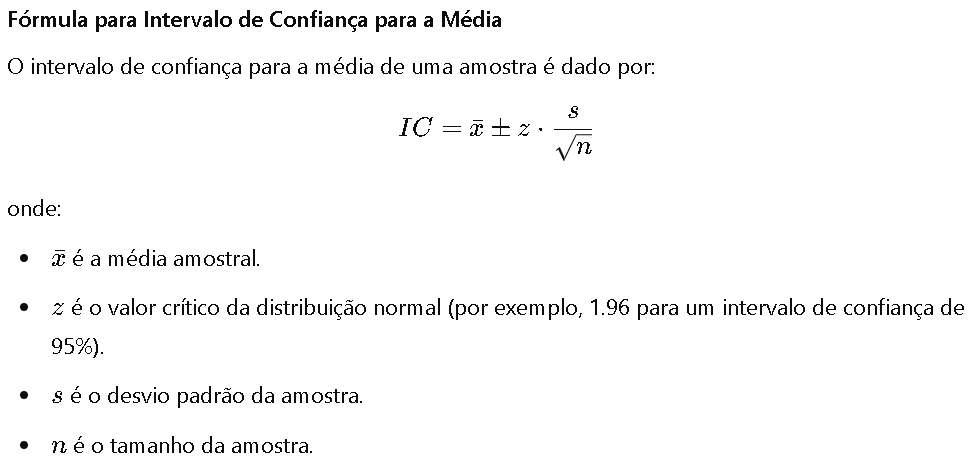

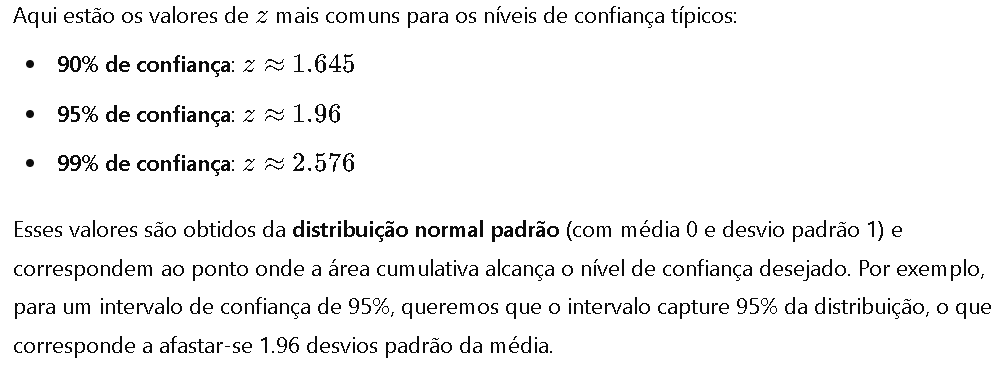

Para calcular o intervalo de confiança de 95% para cada segmento:

In [9]:
from scipy import stats
import numpy as np

# Criando uma função para calcular intervalo de confiança de 95%
def intervalo_de_confianca(media, desvio_padrao, n, nivel=0.95):
    z = stats.norm.ppf(1 - (1 - nivel) / 2)  # valor crítico para 95% de confiança
    margem_erro = z * (desvio_padrao / np.sqrt(n))
    return media - margem_erro, media + margem_erro

# Calculando intervalo de confiança para cada segmento
resultados_ic = []

for segmento in sorted(data['segmento'].unique()):
    segmento_data = data[data['segmento'] == segmento]['satisfacao']
    media = segmento_data.mean()
    desvio_padrao = segmento_data.std()
    n = len(segmento_data)
    ic_inferior, ic_superior = intervalo_de_confianca(media, desvio_padrao, n)
    
    resultados_ic.append({
        "Segmento": segmento,
        "Intervalo de Confiança Inferior": ic_inferior,
        "Intervalo de Confiança Superior": ic_superior
    })

# Exibindo os resultados
df_ic = pd.DataFrame(resultados_ic)
df_ic


,Segmento,Intervalo de Confiança Inferior,Intervalo de Confiança Superior
0,A,2.715648,3.451019
1,B,2.444026,3.092206
2,C,2.665309,3.306522


##### Interpretação dos Resultados do Intervalo de Confiança

Suponha que os intervalos de confiança para o Segmento A sejam (2.8, 3.3):

Isso significa que, com 95% de confiança, a média de satisfação para a população do Segmento A está entre 2.8 e 3.3.

Se o intervalo de confiança não incluir um valor de satisfação desejável (por exemplo, maior que 4), isso indica que a satisfação média da população de clientes desse segmento provavelmente não está em um nível alto.

### 4.2. Teste de Hipóteses

Para entender se há uma diferença significativa entre a média de satisfação dos segmentos, podemos usar um teste de hipóteses. Neste caso, vamos verificar se a satisfação média de dois segmentos é significativamente diferente.

Para entender se há uma diferença significativa entre a média de satisfação dos segmentos, podemos usar um teste de hipóteses. Neste caso, vamos verificar se a satisfação média de dois segmentos é significativamente diferente.


###### Exemplo de Hipótese

Vamos testar se há uma diferença significativa entre a média de satisfação dos Segmentos A e B.

- Hipótese Nula (H0): A média de satisfação do Segmento A é igual à do Segmento B.
- Hipótese Alternativa (H1): A média de satisfação do Segmento A é diferente da do Segmento B.

Usamos o teste t para duas amostras independentes para comparar as médias dos dois segmentos.

In [10]:
# Definindo os dados para os dois segmentos
satisfacao_A = data[data['segmento'] == 'A']['satisfacao']
satisfacao_B = data[data['segmento'] == 'B']['satisfacao']

# Realizando o teste t
t_stat, p_value = stats.ttest_ind(satisfacao_A, satisfacao_B)

# Exibindo os resultados
print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")


Estatística t: 1.27
Valor-p: 0.2080


##### Interpretação dos Resultados do Teste de Hipóteses

Estatística t: O valor da estatística t indica o quão distante a média dos Segmentos A e B está uma da outra, em termos das variabilidades das amostras.

- Valor-p: O valor-p indica a probabilidade de observarmos uma diferença tão extrema entre as médias das amostras, assumindo que a hipótese nula é verdadeira.

Se o valor-p for menor que o nível de significância (geralmente 0.05 para um teste de 95% de confiança), rejeitamos a hipótese nula. Isso indica que existe uma diferença estatisticamente significativa entre a média de satisfação dos dois segmentos.

Por exemplo, se obtivermos:

Estatística t: 2.5
Valor-p: 0.02


Neste caso, como o valor-p (0.02) é menor que 0.05, rejeitamos a hipótese nula e concluímos que existe uma diferença significativa na satisfação média entre os clientes dos Segmentos A e B.



##### Usando inferência estatística, conseguimos fazer afirmações sobre a população com base nas amostras.

Nesse contexto:

Intervalos de confiança ajudam a entender a faixa provável da satisfação média para cada segmento, fornecendo insights sobre a satisfação esperada dos clientes de cada grupo.

Testes de hipóteses permitem verificar se há diferenças significativas entre os segmentos, orientando decisões sobre onde focar melhorias na satisfação.

Essas ferramentas são fundamentais para tomar decisões com base em dados, generalizando insights para a população e guiando estratégias de satisfação direcionadas para cada grupo de clientes.